In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import norm 

In [2]:
# To import the dataset from the UCI repository.

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
# metadata 
print(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 


d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [3]:
df = pd.concat([X, y], axis=1)

In [4]:
df_copy = df.copy()

In [114]:
df = df_copy.copy()

In [5]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [6]:
# Combine Date and Time into a single column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original Date and Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [8]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime'],
      dtype='object')

## Handling Null Values

In [9]:
df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [10]:
Float_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in Float_columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('--------------------------------------')

Global_active_power
6534
['4.216' '5.360' '5.374' ... 4.068 3.94 3.74]
--------------------------------------
Global_reactive_power
896
['0.418' '0.436' '0.498' '0.502' '0.528' '0.522' '0.520' '0.510' '0.470'
 '0.478' '0.398' '0.422' '0.282' '0.152' '0.156' '0.000' '0.076' '0.090'
 '0.200' '0.058' '0.180' '0.144' '0.118' '0.108' '0.202' '0.192' '0.186'
 '0.116' '0.136' '0.148' '0.160' '0.158' '0.100' '0.082' '0.050' '0.052'
 '0.162' '0.086' '0.048' '0.054' '0.068' '0.166' '0.174' '0.178' '0.188'
 '0.088' '0.080' '0.070' '0.084' '0.074' '0.106' '0.092' '0.064' '0.046'
 '0.138' '0.134' '0.132' '0.120' '0.130' '0.154' '0.078' '0.142' '0.140'
 '0.146' '0.150' '0.170' '0.102' '0.072' '0.060' '0.056' '0.062' '0.112'
 '0.066' '0.172' '0.168' '0.194' '0.184' '0.096' '0.164' '0.182' '0.094'
 '0.098' '0.176' '0.190' '0.204' '0.220' '0.198' '0.208' '0.244' '0.334'
 '0.298' '0.296' '0.286' '0.278' '0.104' '0.258' '0.238' '0.256' '0.214'
 '0.230' '0.210' '0.240' '0.124' '0.122' '0.270' '0.302' '0.2

In [11]:
for col in Float_columns:
    try: 
        df[col] = df[col].replace('?',np.nan)
    except:
        pass

In [12]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df.reset_index(drop = True ,inplace = True)

In [15]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [17]:
df.shape

(2049280, 8)

## Duplicates Row Check

In [18]:
df.duplicated().sum()

np.int64(0)

## Columns DataType Convertion

In [19]:
Float_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for i in Float_columns:
    try:
        df[i] = df[i].astype(float)
    except:
        print(i)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 125.1 MB


In [21]:
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


## Detecting Outliers by various method

1) Boxplot Method

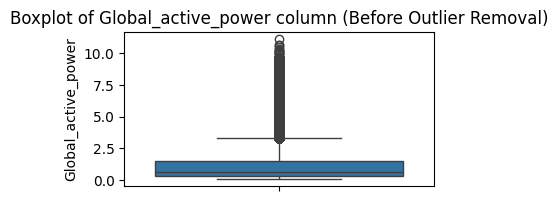

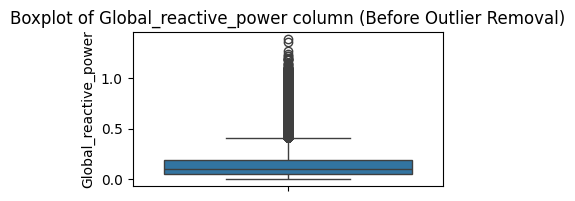

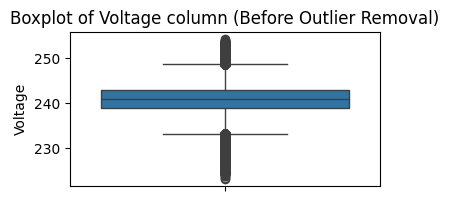

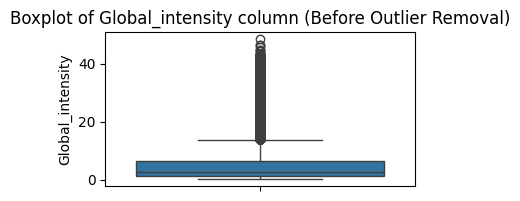

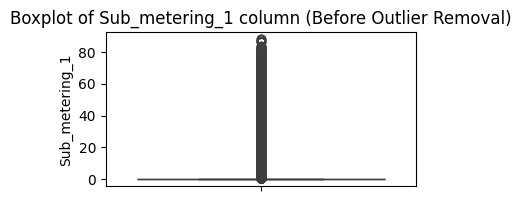

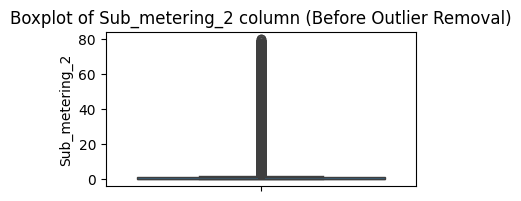

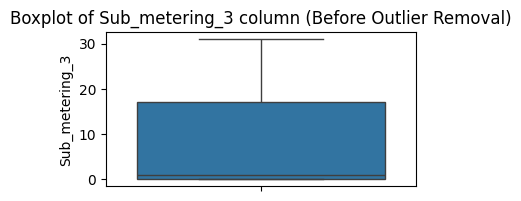

In [ ]:
# Visualizing Outliers using Boxplot
for i in Float_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data=df[i])
    plt.title(f"Boxplot of {i} column (Before Outlier Removal)")
    plt.show()

2) Z-Score Method

In [27]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2049280
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-02 00:59:44.397740544
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-10 05:37:45
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-11-30 01:22:30
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-11-23 20:31:15
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN


In [24]:
# Function to calculate Z-score bounds and outlier counts
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_stats = []
    for col in columns:
        # Calculate Z-scores using scipy's zscore method
        z_scores = zscore(df[col])
        
        # Count outliers based on the threshold
        outliers = (abs(z_scores) > threshold).sum()
        
        # Append results for this column
        outlier_stats.append({
            "Column": col,
            "Outliers": outliers
        })
    
    return pd.DataFrame(outlier_stats)

# Detect outliers using Z-score
outlier_zscore_stats = detect_outliers_zscore(df, Float_columns)

# Display the Z-score outlier statistics
outlier_zscore_stats


,Column,Outliers
0,Global_active_power,36160
1,Global_reactive_power,24480
2,Voltage,12759
3,Global_intensity,37434
4,Sub_metering_1,56097
5,Sub_metering_2,50993
6,Sub_metering_3,0


3) IQR Method

In [29]:
# Function to calculate IQR bounds and outlier counts
def detect_outliers_iqr(df, columns):
    outlier_stats = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        outlier_stats.append({
            "Column": col,
            "Lower Bound": lower_bound,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            "Upper Bound": upper_bound,
            "Outliers": outliers
        })
    
    return pd.DataFrame(outlier_stats)

# Detect outliers using IQR
outlier_iqr_stats = detect_outliers_iqr(df, Float_columns)

outlier_iqr_stats


,Column,Lower Bound,Q1,Q3,IQR,Upper Bound,Outliers
0,Global_active_power,-1.522,0.308,1.528,1.220,3.358,94907
1,Global_reactive_power,-0.171,0.048,0.194,0.146,0.413,40420
2,Voltage,233.140,238.990,242.890,3.900,248.740,51067
3,Global_intensity,-6.100,1.400,6.400,5.000,13.900,100961
4,Sub_metering_1,0.000,0.000,0.000,0.000,0.000,169105
5,Sub_metering_2,-1.500,0.000,1.000,1.000,2.500,77151
6,Sub_metering_3,-25.500,0.000,17.000,17.000,42.500,0


4) Plot distplot with Fitted Curve for all the Numerical Columns

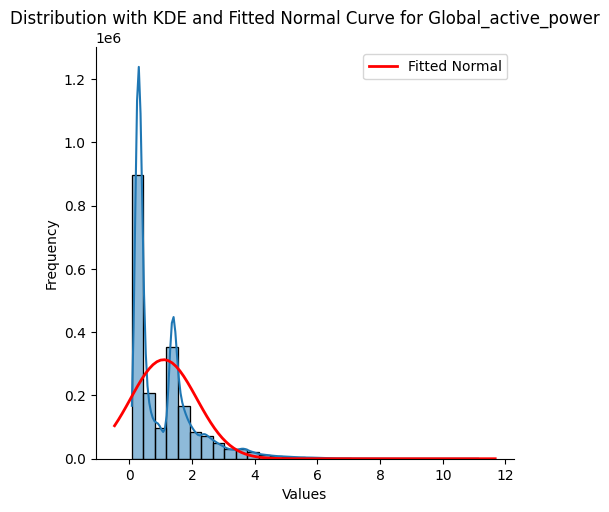

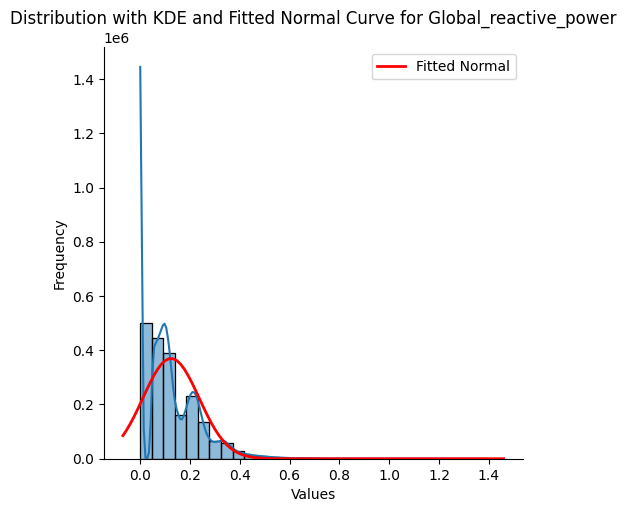

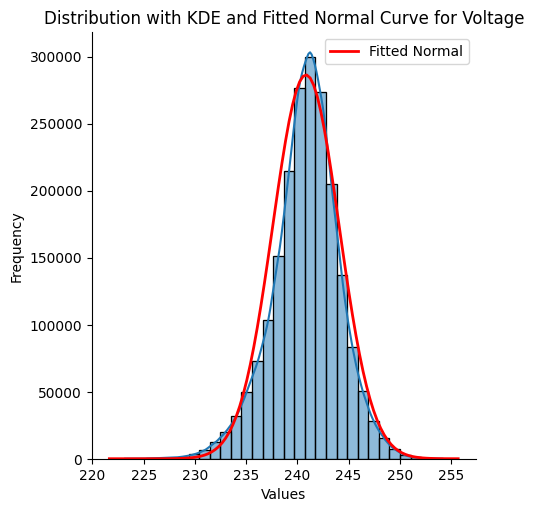

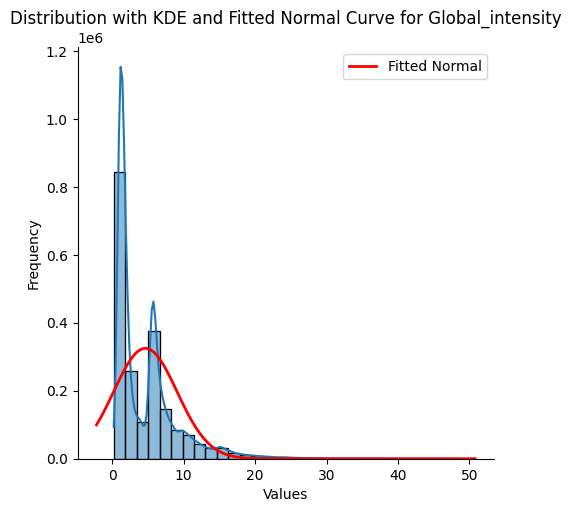

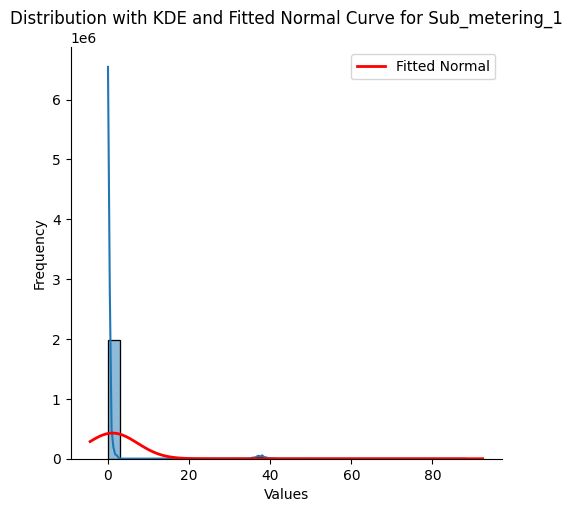

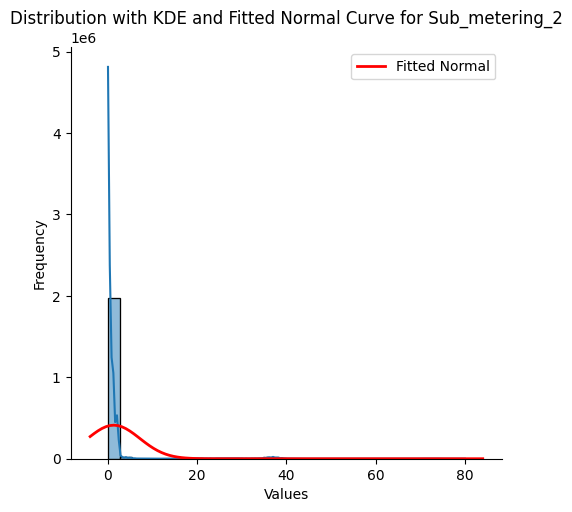

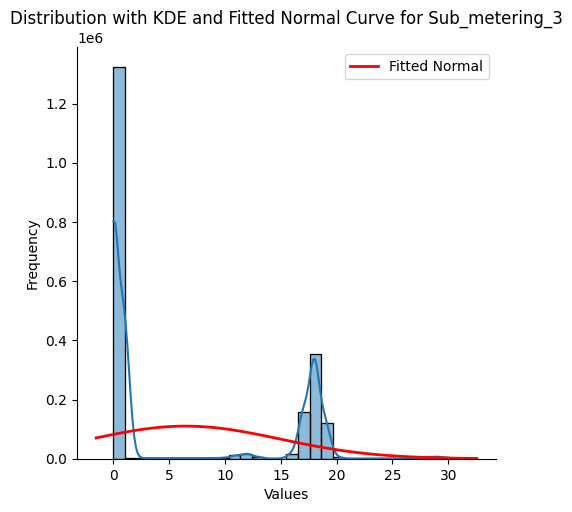

In [31]:
for col in Float_columns:

    # Create a displot with KDE for the column data
    sns.displot(df[col], kde=True, bins=30)

    # Fit a normal distribution to the column data
    mu, sigma = norm.fit(df[col])  # Calculate mean (mu) and standard deviation (sigma)

    # Generate x values for the fitted normal curve
    xmin, xmax = plt.xlim()  # Get the x-axis limits
    x = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x, mu, sigma)  # Generate the PDF

    # Overlay the fitted normal distribution curve on the plot
    plt.plot(x, pdf * len(df[col]) * (xmax - xmin) / 30, color='red', lw=2, label='Fitted Normal')
    plt.title(f'Distribution with KDE and Fitted Normal Curve for {col}')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()



In [32]:
#Checking Skewness and Kurtosis fot the all numerical columns
for column in Float_columns:
    print(f'Skewness of the {column} : ',df[column].skew())
    print(f'Kurtosis of the {column} : ',df[column].kurtosis())
    print("-----------------------------------------")

Skewness of the Global_active_power :  1.7862333920915965
Kurtosis of the Global_active_power :  4.218685087072209
-----------------------------------------
Skewness of the Global_reactive_power :  1.2619141974704149
Kurtosis of the Global_reactive_power :  2.6056327677496105
-----------------------------------------
Skewness of the Voltage :  -0.3266649756878288
Kurtosis of the Voltage :  0.7247070166090799
-----------------------------------------
Skewness of the Global_intensity :  1.8490999040716398
Kurtosis of the Global_intensity :  4.601242858337602
-----------------------------------------
Skewness of the Sub_metering_1 :  5.944541281563981
Kurtosis of the Sub_metering_1 :  35.642992681719356
-----------------------------------------
Skewness of the Sub_metering_2 :  7.0905532303433985
Kurtosis of the Sub_metering_2 :  57.90734360431289
-----------------------------------------
Skewness of the Sub_metering_3 :  0.7246883225039495
Kurtosis of the Sub_metering_3 :  -1.28219753127

## Feature Engineering

In [34]:
# extract features from the Datetime column
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.weekday  # Monday=0, Sunday=6
df['Weekend'] = (df['Weekday'] >= 5).astype(int)  # 1 if weekend, 0 otherwise
df['Is_Night'] = ((df['Hour'] >= 22) | (df['Hour'] < 6)).astype(int)  # 1 if night, 0 otherwise

In [35]:
# Other energy Consumptions 
df['Residual_Power'] = (df['Global_active_power'] * 1000 / 60) - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']


In [39]:
# Rolling Averages
df['Rolling_Mean_10min'] = df['Global_active_power'].rolling(window=10, min_periods=1).mean()
df['Rolling_Mean_1h'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()
df['Rolling_Mean_24h'] = df['Global_active_power'].rolling(window=1440, min_periods=1).mean()

In [45]:
#  Anomaly Detection Feature
df['Energy_Deviation'] = df['Global_active_power'] - df['Rolling_Mean_10min']
df['Anomaly'] = (abs(df['Energy_Deviation']) > 1.5 * df['Rolling_Mean_1h']).astype(int)

In [51]:
df.drop(columns=['Datetime'], inplace = True)

In [53]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Weekend',
       'Is_Night', 'Residual_Power', 'Rolling_Mean_1h', 'Rolling_Mean_24h',
       'Rolling_Mean_10min', 'Energy_Deviation', 'Anomaly'],
      dtype='object')

In [57]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Weekday,Weekend,Is_Night,Residual_Power,Rolling_Mean_1h,Rolling_Mean_24h,Rolling_Mean_10min,Energy_Deviation,Anomaly
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,5,1,0,52.266667,4.216000,4.216000,4.216000,0.000000,0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,5,1,0,72.333333,4.788000,4.788000,4.788000,0.572000,0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,5,1,0,70.566667,4.983333,4.983333,4.983333,0.390667,0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,5,1,0,71.800000,5.084500,5.084500,5.084500,0.303500,0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,5,1,0,43.100000,4.800800,4.800800,4.800800,-1.134800,0


## EXPOLATORY DATA ANALYSIS

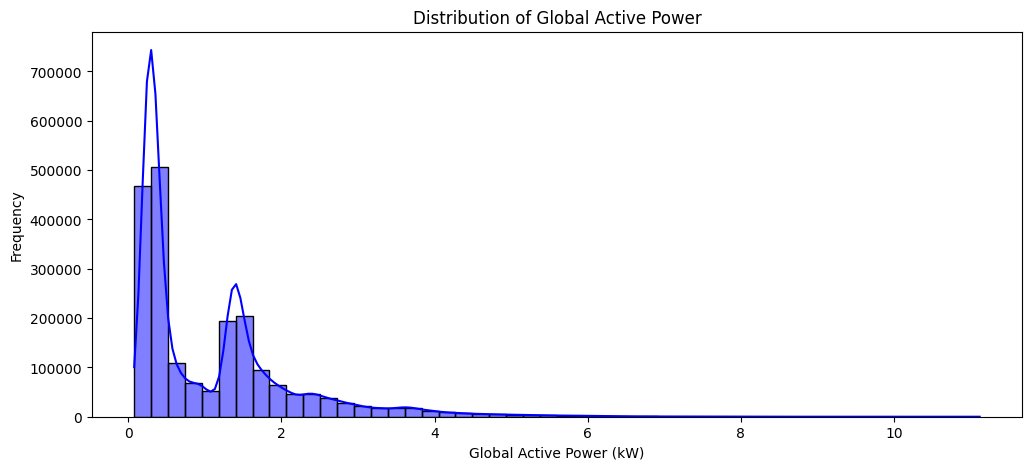

In [49]:
#  **Distribution of Energy Consumption (Global Active Power)**
plt.figure(figsize=(12,5))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='blue')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.show()

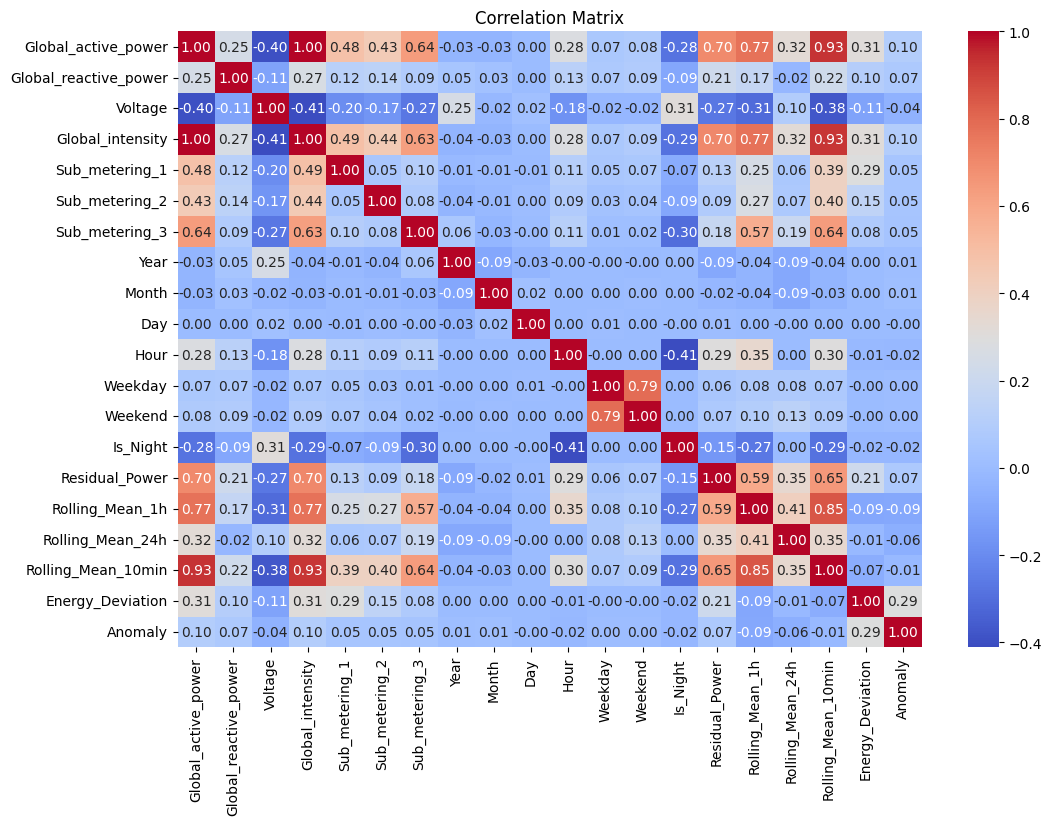

In [58]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

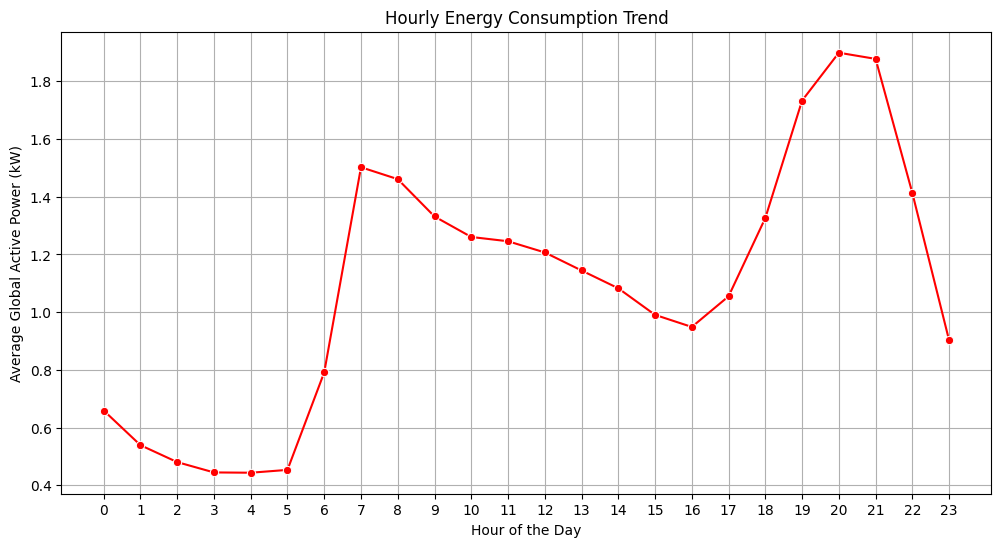

In [65]:
# Compute the mean energy consumption per hour
hourly_trend = df.groupby('Hour')['Global_active_power'].mean()

# Plot lineplot for energy consumption trend by hour
plt.figure(figsize=(12,6))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker='o', color='red')

# Set labels and title
plt.title('Hourly Energy Consumption Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid()

# Show plot
plt.show()

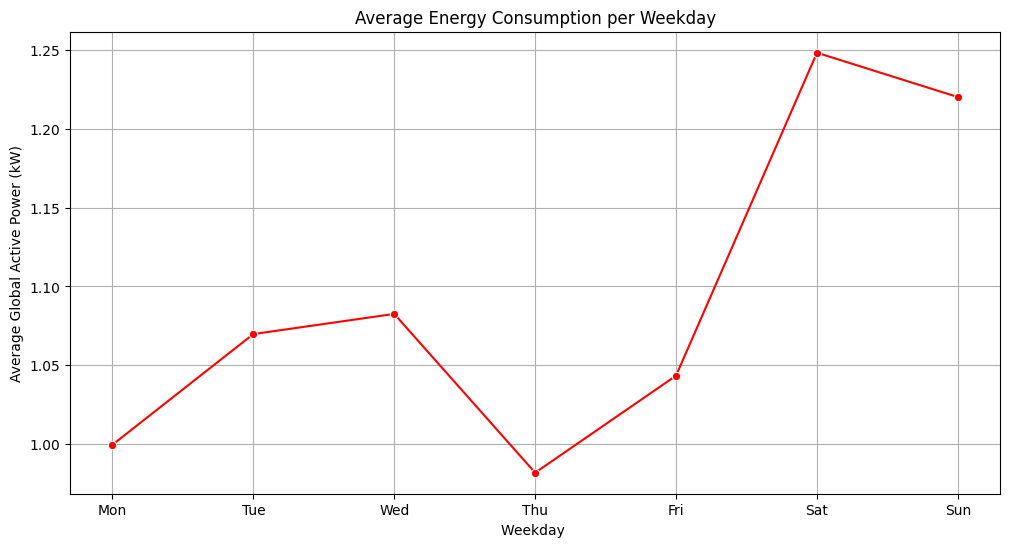

In [69]:
# Compute average energy consumption per weekday
weekly_trend = df.groupby('Weekday')['Global_active_power'].mean()

# Plot weekday energy consumption trend
plt.figure(figsize=(12,6))
sns.lineplot(x=weekly_trend.index, y=weekly_trend.values, marker='o', color='red')

# Set labels and title
plt.title('Average Energy Consumption per Weekday')
plt.xlabel('Weekday ')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Format x-axis
plt.grid()

# Show plot
plt.show()

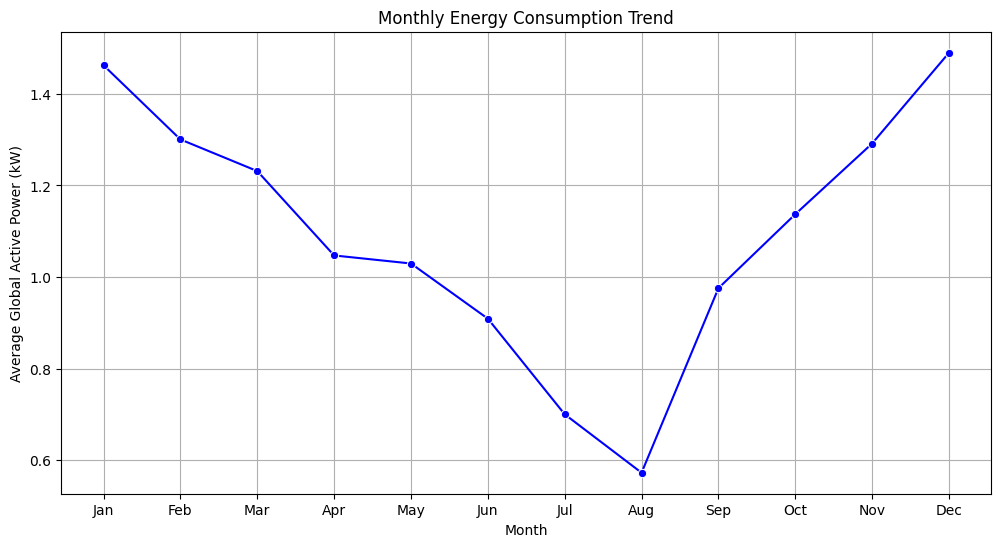

In [74]:
# Compute average energy consumption per month
monthly_trend = df.groupby('Month')['Global_active_power'].mean()

# Plot month-wise energy consumption trend
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='blue')

# Set labels and title
plt.title('Monthly Energy Consumption Trend')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Format x-axis
plt.grid()

# Show plot
plt.show()

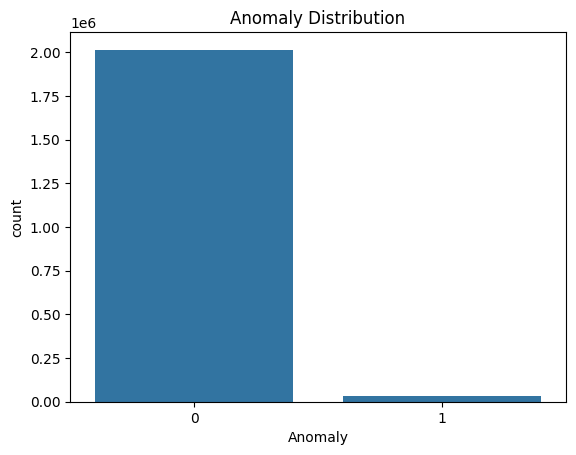

In [75]:
# Count of anomalies
sns.countplot(x='Anomaly', data=df)
plt.title('Anomaly Distribution')
plt.show()

In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Month                  int32  
 8   Day                    int32  
 9   Hour                   int32  
 10  Weekday                int32  
 11  Weekend                int64  
 12  Is_Night               int64  
 13  Residual_Power         float64
 14  Rolling_Mean_1h        float64
 15  Rolling_Mean_24h       float64
 16  Rolling_Mean_10min     float64
 17  Energy_Deviation       float64
 18  Anomaly                int64  
dtypes: float64(12), int32(4), int64(3)
memory usage: 265.8 MB
None


## Feature Selection

Correlation Method

In [90]:
# Using Pandas to calculate Pearson's correlation coefficient
correlation_matrix = df.corr()
correlation_matrix 


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Day,Hour,Weekday,Weekend,Is_Night,Residual_Power,Rolling_Mean_1h,Rolling_Mean_24h,Rolling_Mean_10min,Energy_Deviation,Anomaly
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,-0.032654,0.002052,0.281602,0.065813,0.084633,-0.283880,0.701380,0.773636,0.324980,0.929018,0.305520,0.096112
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.027211,0.000674,0.127892,0.069531,0.088927,-0.092526,0.211624,0.168506,-0.020345,0.219074,0.102254,0.069010
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.015191,0.023525,-0.176050,-0.021412,-0.021743,0.306262,-0.271371,-0.308107,0.095039,-0.376479,-0.109029,-0.044846
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,-0.031417,0.001447,0.281972,0.067210,0.086542,-0.285126,0.703258,0.768905,0.318260,0.926546,0.308885,0.099427
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,-0.007513,-0.005312,0.108491,0.052961,0.065175,-0.070076,0.125067,0.253235,0.064195,0.394719,0.290292,0.049871
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,-0.009763,0.003657,0.087210,0.031836,0.042660,-0.092404,0.085201,0.271264,0.070528,0.397846,0.147891,0.051423
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,-0.030791,-0.000799,0.113873,0.013536,0.018087,-0.302949,0.178724,0.572762,0.190223,0.636906,0.082702,0.045732
Month,-0.032654,0.027211,-0.015191,-0.031417,-0.007513,-0.009763,-0.030791,1.000000,0.018988,0.000011,0.000241,0.002181,0.000050,-0.022174,-0.038449,-0.088315,-0.034220,0.000018,0.014563
Day,0.002052,0.000674,0.023525,0.001447,-0.005312,0.003657,-0.000799,0.018988,1.000000,0.000676,0.005102,0.000885,-0.000045,0.005664,0.001944,-0.000267,0.002070,0.000205,-0.000241
Hour,0.281602,0.127892,-0.176050,0.281972,0.108491,0.087210,0.113873,0.000011,0.000676,1.000000,-0.000303,0.000082,-0.408396,0.294831,0.350773,0.000498,0.298725,-0.009463,-0.016717
